In [1]:
import discord
from discord.ext import commands
import csv
import nest_asyncio

# Use nest_asyncio to allow running asyncio code in Jupyter notebooks
nest_asyncio.apply()

# Replace 'YOUR_BOT_TOKEN' with the actual token you copied
TOKEN = 'TokenID'


intents = discord.Intents.all()  # Enable all intents
bot = commands.Bot(command_prefix='!', intents=intents)



@bot.event
async def on_ready():
    print(f'We have logged in as {bot.user}')

    # Specify the channel ID you want to fetch data from
    channel_id = 123456789123456789  # Replace with your channel ID
    
    
    header = f"Author%%Message%%Timestamp\n"
    channel = bot.get_channel(channel_id)
    
    # Write data to CSV file
    csv_file_path = '/path/to/yourFile/discord_channel_data.csv'
    
    with open(csv_file_path, 'w', encoding='utf-8') as f:
        f.write(str(header))
    
        async for message in channel.history(limit=500):
            entry = f"{message.author.name}%%{message.content}%%{message.created_at.strftime('%Y-%m-%d %H:%M:%S')}\n"
            print(entry)
            f.write(entry)
            
# Use bot.start instead of bot.run for Jupyter notebooks
await bot.start(TOKEN)


We have logged in as NedaBot#9138
frahlg%%<@865885852266004501> and <@988724186153361408> . Really good work with the presentations this weekend. I have now reported all grades in ladok. Essentially, those that missed PR have gotten an E even though they've made good reports.%%2023-08-28 17:24:30

nedamaleki%%No. They are more than 11. They are 21. One didnt show up. I have graded them on my paper and will enter them soon. ☺️%%2023-08-28 07:07:47

frahlg%%According to this doc: https://docs.google.com/spreadsheets/d/1eV5gFz-wuU0mT_nIzsGVwTwXCKKU0vuee1xeb96n2VY/edit#gid=0%%2023-08-28 06:46:48

frahlg%%11, is that right?%%2023-08-28 06:46:36

frahlg%%I've now gone through the grading document and checked Canvas, also graded them in Ladok.%%2023-08-28 06:46:30

arslanmusaddiq%%We re in the office.%%2023-08-26 07:54:22

frahlg%%Are you in the office or from home?%%2023-08-26 07:54:11

frahlg%%Great!%%2023-08-26 07:54:05

arslanmusaddiq%%For grading%%2023-08-26 07:53:58

arslanmusaddiq%%htt

CancelledError: 

In [2]:
# data analysis and manipulation libraries
import numpy as np 
import pandas as pd 
from datetime import timedelta
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
# libraries for nlp tasks
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Model used for Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
# For topic modelling
import gensim
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
# for storing objects as pickle files
import pickle
# Counting items in a list and returning as a dictionary
from collections import Counter
# library for statistical analysis 
from scipy import stats
# Disable all warnings
import warnings
warnings.filterwarnings("ignore")
#import imaging Library
from PIL import Image

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
# importing the dataset
df = pd.read_csv("discord_channel_data.csv", delimiter='%%')
df

,Author,Message,Timestamp
0,frahlg,<@865885852266004501> and <@988724186153361408...,2023-08-28 17:24:30
1,nedamaleki,No. They are more than 11. They are 21. One di...,2023-08-28 07:07:47
2,frahlg,According to this doc: https://docs.google.com...,2023-08-28 06:46:48
3,frahlg,"11, is that right?",2023-08-28 06:46:36
4,frahlg,I've now gone through the grading document and...,2023-08-28 06:46:30
...,...,...,...
531,marcozennaro,Hi Fredrik! Will today's meeting be held here? 🙂,2021-05-04 15:56:46
532,marcozennaro,Hi Francis!,2021-05-03 17:11:15
533,francispalma,Welcome 😀,2021-04-26 16:05:44
534,leitet,Hi all! Excited about this course! Not sure ex...,2021-03-13 14:17:52


In [4]:
print(df.columns)

Index(['Author', 'Message', 'Timestamp'], dtype='object')


In [5]:
print(df.dtypes)

Author       object
Message      object
Timestamp    object
dtype: object


In [6]:
def convert_to_datetime(x):
    try:
        return pd.to_datetime(x)
    except:
        return np.nan
print (df)
df['Timestamp'] = df['Timestamp'].apply(lambda x: convert_to_datetime(x))
print("Null values Count, Prior to any Processing:")
print(df.isnull().sum())
df = df.dropna()
df["date only"] = df["Timestamp"].dt.date 
#df = df.drop("id", axis=1) #id not providing any useful information
print("Null values Count, After Processing:")
print(df.isnull().sum())
df.head(3)

           Author                                            Message  \
0          frahlg  <@865885852266004501> and <@988724186153361408...   
1      nedamaleki  No. They are more than 11. They are 21. One di...   
2          frahlg  According to this doc: https://docs.google.com...   
3          frahlg                                 11, is that right?   
4          frahlg  I've now gone through the grading document and...   
..            ...                                                ...   
531  marcozennaro   Hi Fredrik! Will today's meeting be held here? 🙂   
532  marcozennaro                                        Hi Francis!   
533  francispalma                                          Welcome 😀   
534        leitet  Hi all! Excited about this course! Not sure ex...   
535        frahlg  <@!784419624744910919> , we can keep the teach...   

               Timestamp  
0    2023-08-28 17:24:30  
1    2023-08-28 07:07:47  
2    2023-08-28 06:46:48  
3    2023-08-28 06:46:36  


,Author,Message,Timestamp,date only
0,frahlg,<@865885852266004501> and <@988724186153361408...,2023-08-28 17:24:30,2023-08-28
1,nedamaleki,No. They are more than 11. They are 21. One di...,2023-08-28 07:07:47,2023-08-28
2,frahlg,According to this doc: https://docs.google.com...,2023-08-28 06:46:48,2023-08-28


In [7]:
!pip3 install contractions

Defaulting to user installation because normal site-packages is not writeable


In [8]:
print(df.columns)

Index(['Author', 'Message', 'Timestamp', 'date only'], dtype='object')


In [9]:
print(df)

           Author                                            Message  \
0          frahlg  <@865885852266004501> and <@988724186153361408...   
1      nedamaleki  No. They are more than 11. They are 21. One di...   
2          frahlg  According to this doc: https://docs.google.com...   
3          frahlg                                 11, is that right?   
4          frahlg  I've now gone through the grading document and...   
..            ...                                                ...   
531  marcozennaro   Hi Fredrik! Will today's meeting be held here? 🙂   
532  marcozennaro                                        Hi Francis!   
533  francispalma                                          Welcome 😀   
534        leitet  Hi all! Excited about this course! Not sure ex...   
535        frahlg  <@!784419624744910919> , we can keep the teach...   

              Timestamp   date only  
0   2023-08-28 17:24:30  2023-08-28  
1   2023-08-28 07:07:47  2023-08-28  
2   2023-08-28 06:46:

In [10]:
# Extract out hashtags in the discord_messages
df["accounts_mentioned"] = df["Message"].apply(lambda x: re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", x) )
# Extract out mentioned accounts in the discord_messages
df["hashtags"] = df["Message"].apply(lambda x: re.findall("#(\w+)",x))
discord_messages = df["Message"] #df with only discord_messages
# remove urls
discord_messages = discord_messages.apply(lambda x: re.sub('http\S+', '', x))
# remove mentions
discord_messages = discord_messages.apply(lambda x: re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", '', x))
# remove hashtags
discord_messages = discord_messages.apply(lambda x: re.sub("#(\w+)", '', x))
# expand contractions
import contractions
import nltk
nltk.download('wordnet')
discord_messages = discord_messages.apply(lambda x: contractions.fix(x))
# remove punctuations and emoticons
discord_messages = discord_messages.apply(lambda x: re.sub('[^\w\s]', '', x))
# remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
discord_messages = discord_messages.apply(lambda x: " ".join([w for w in x.split() if w.lower() not in stop_words]) )
# lower case all words
discord_messages = discord_messages.apply(lambda x: x.lower() )
df = pd.merge(df, discord_messages, how="inner", left_index=True, right_index=True)
# lemmatize the words after tokenizing
df['Message_y'] = df['Message_y'].apply(lambda x: word_tokenize(x))
lemmatizer = WordNetLemmatizer()
df['Message_y'] = df['Message_y'].apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in x]) )
# remove hashtags, urls and accounts mentioned
df["content_to_input"] = df["Message_x"]
df["content_to_input"] = df["content_to_input"].apply(lambda x: re.sub('http\S+', '', x))
df["content_to_input"] =  df["content_to_input"].apply(lambda x: re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", '', x))
df["content_to_input"] = df["content_to_input"].apply(lambda x: re.sub("#(\w+)", '', x))
df.head(5)

[nltk_data] Downloading package wordnet to /Users/nemaaa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Author,Message_x,Timestamp,date only,accounts_mentioned,hashtags,Message_y,content_to_input
0,frahlg,<@865885852266004501> and <@988724186153361408...,2023-08-28 17:24:30,2023-08-28,[],[],865885852266004501 988724186153361408 really g...,<@865885852266004501> and <@988724186153361408...
1,nedamaleki,No. They are more than 11. They are 21. One di...,2023-08-28 07:07:47,2023-08-28,[],[],11 21 one show graded paper enter soon,No. They are more than 11. They are 21. One di...
2,frahlg,According to this doc: https://docs.google.com...,2023-08-28 06:46:48,2023-08-28,[],[gid],according doc,According to this doc:
3,frahlg,"11, is that right?",2023-08-28 06:46:36,2023-08-28,[],[],11 right,"11, is that right?"
4,frahlg,I've now gone through the grading document and...,2023-08-28 06:46:30,2023-08-28,[],[],gone grading document checked canvas also grad...,I've now gone through the grading document and...


In [11]:
print(df.columns)

Index(['Author', 'Message_x', 'Timestamp', 'date only', 'accounts_mentioned',
       'hashtags', 'Message_y', 'content_to_input'],
      dtype='object')


In [12]:
sid = SentimentIntensityAnalyzer()
df["Polarity Scores"] = df["content_to_input"].apply(lambda x: sid.polarity_scores(x))
def sentiment_label(x):
    if x["compound"]>0.05:
        return "Positive"
    elif x["compound"]<-0.05:
        return "Negative"
    else: 
        return "Neutral"
df["Sentiment_Label"] = df["Polarity Scores"].apply(lambda x: sentiment_label(x))
df = df.drop("Polarity Scores", axis=1)
df.head(4)


,Author,Message_x,Timestamp,date only,accounts_mentioned,hashtags,Message_y,content_to_input,Sentiment_Label
0,frahlg,<@865885852266004501> and <@988724186153361408...,2023-08-28 17:24:30,2023-08-28,[],[],865885852266004501 988724186153361408 really g...,<@865885852266004501> and <@988724186153361408...,Positive
1,nedamaleki,No. They are more than 11. They are 21. One di...,2023-08-28 07:07:47,2023-08-28,[],[],11 21 one show graded paper enter soon,No. They are more than 11. They are 21. One di...,Negative
2,frahlg,According to this doc: https://docs.google.com...,2023-08-28 06:46:48,2023-08-28,[],[gid],according doc,According to this doc:,Neutral
3,frahlg,"11, is that right?",2023-08-28 06:46:36,2023-08-28,[],[],11 right,"11, is that right?",Neutral


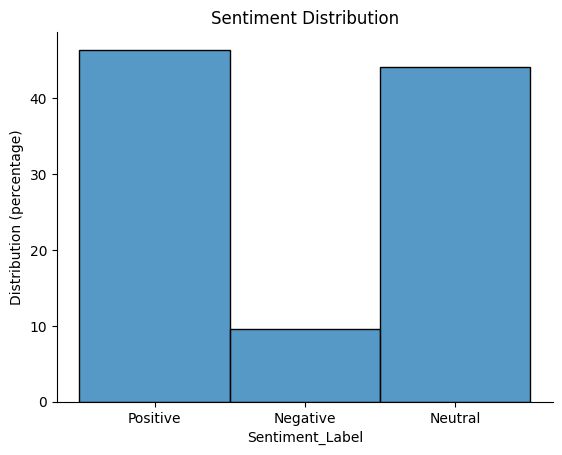

In [13]:
ax = sns.histplot(data=df, x="Sentiment_Label", stat="percent" )
plt.title("Sentiment Distribution")
plt.ylabel("Distribution (percentage)")
ax.spines[['right', 'top']].set_visible(False)

In [14]:
df_pos = df[df["Sentiment_Label"]=="Positive"]
df_neu = df[df["Sentiment_Label"]=="Neutral"]
df_neg = df[df["Sentiment_Label"]=="Negative"]

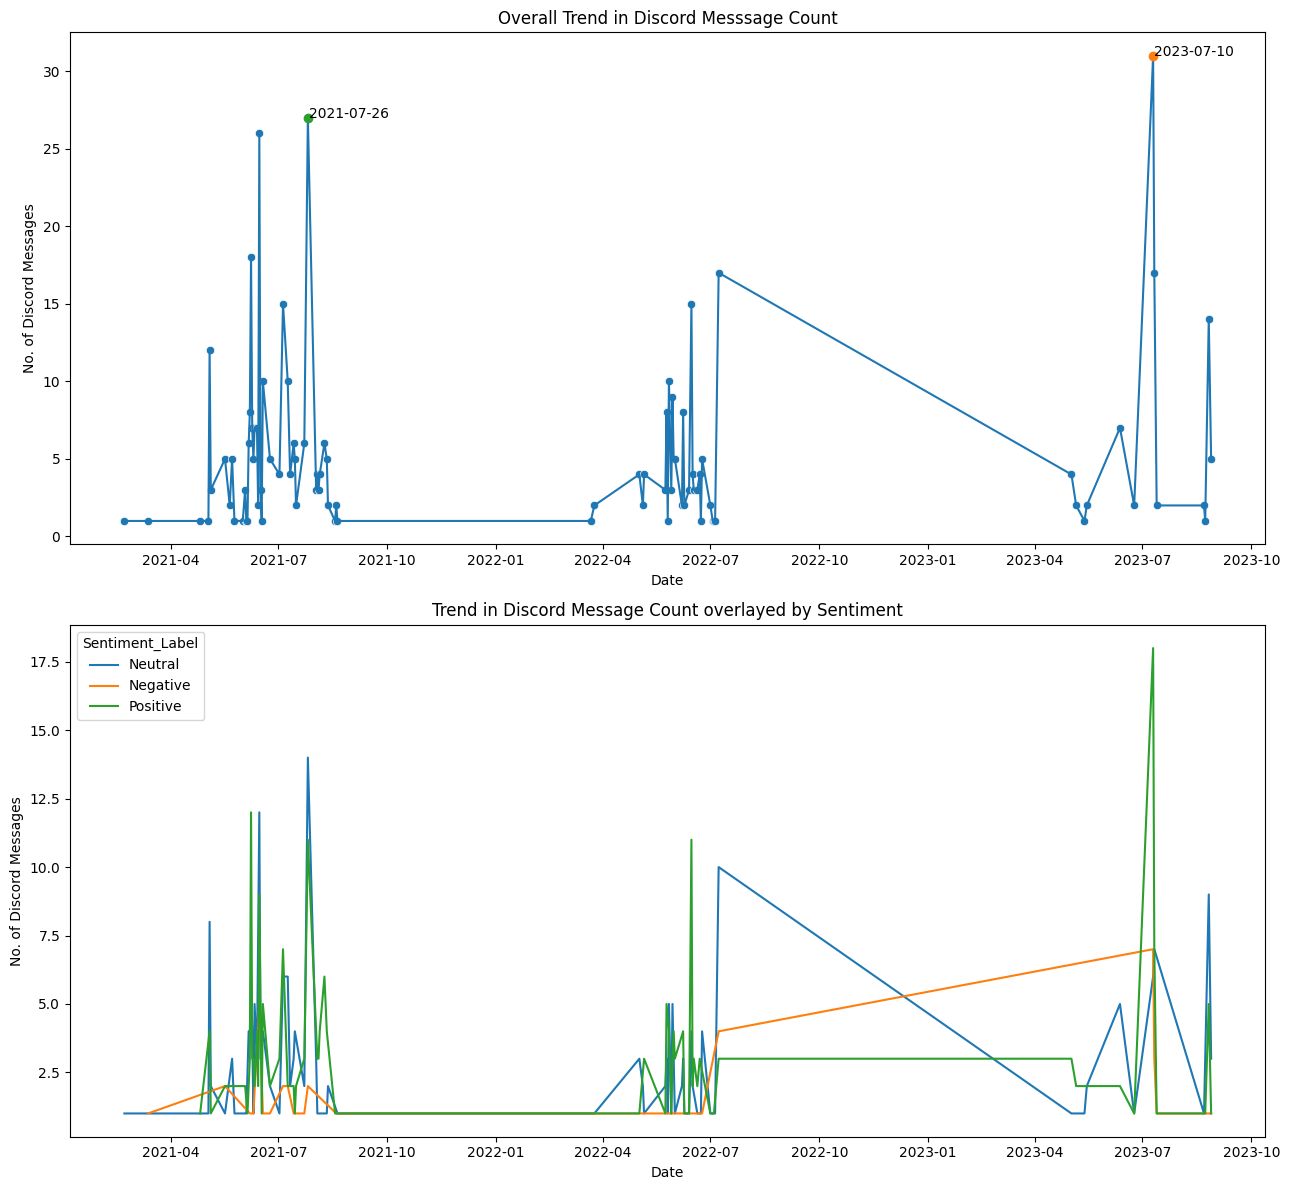

In [15]:
df_grouped_date_sentiment = df.groupby(by=["date only","Sentiment_Label"],as_index=False).count()
df_grouped_date = df.groupby(by=["date only"],as_index=False).count()
df_grouped_date = df_grouped_date[["date only","Message_x"]] 
df_grouped_date_sentiment = df_grouped_date_sentiment[["date only","Sentiment_Label","Message_x"]]
max_2 = df_grouped_date.sort_values(by="Message_x",ascending=False).iloc[:2]
fig = plt.subplots(2,1,figsize=(13,12))
plt.subplot(2,1,1)
sns.lineplot(data=df_grouped_date , x="date only",y="Message_x")
sns.scatterplot(data=df_grouped_date , x="date only",y="Message_x")
plt.ylabel("No. of Discord Messages")
plt.xlabel("Date")
plt.title("Overall Trend in Discord Messsage Count")
plt.text(max_2["date only"].iloc[1]+timedelta(days=1), max_2["Message_x"].iloc[1], str(max_2["date only"].iloc[1]))
plt.text(max_2["date only"].iloc[0]+timedelta(days=1), max_2["Message_x"].iloc[0], str(max_2["date only"].iloc[0]))
plt.plot(max_2["date only"].iloc[0], max_2["Message_x"].iloc[0],marker='o')
plt.plot(max_2["date only"].iloc[1], max_2["Message_x"].iloc[1],marker='o')
plt.tight_layout()
plt.subplot(2,1,2)
sns.lineplot(data=df_grouped_date_sentiment , x="date only",y="Message_x", hue="Sentiment_Label", legend="full")
plt.ylabel("No. of Discord Messages")
plt.xlabel("Date")
plt.title("Trend in Discord Message Count overlayed by Sentiment")
plt.tight_layout()

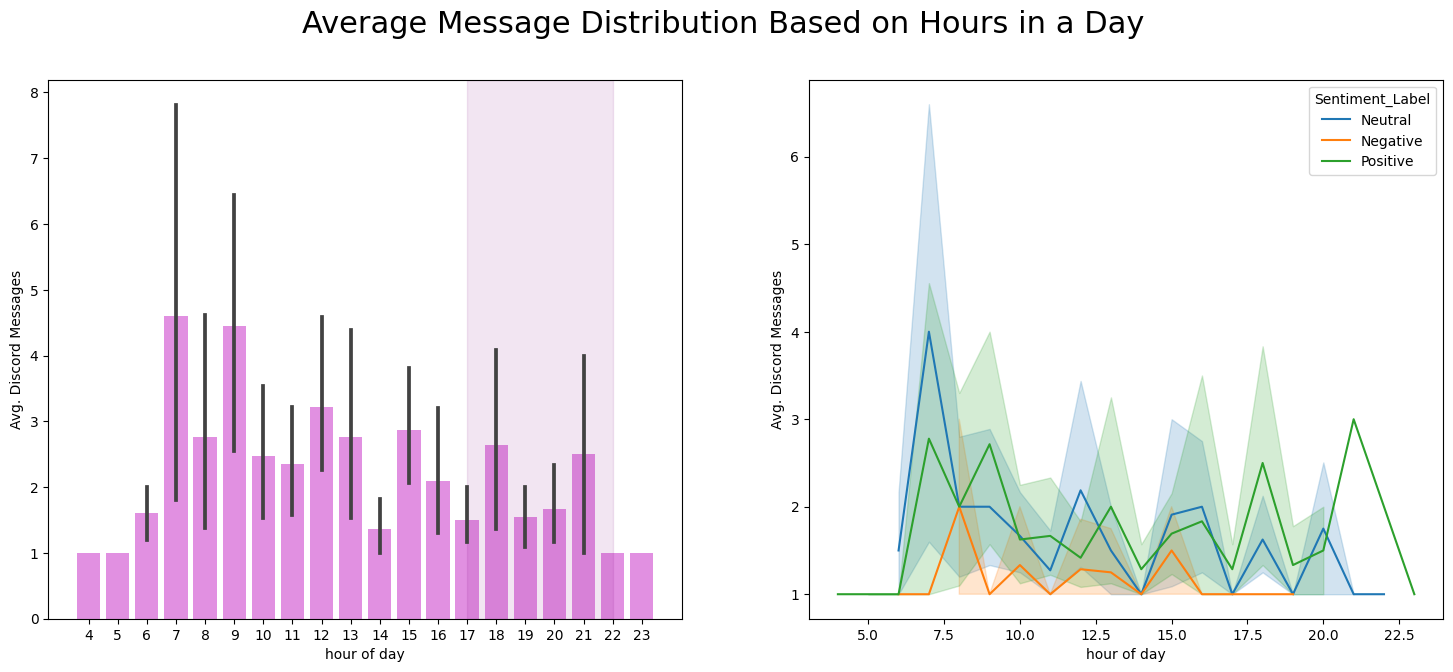

In [16]:
time =df[["Timestamp", 'date only', "Sentiment_Label"]]
time["hour of day"] = time["Timestamp"].dt.hour
# pandas df representing number of discord messages every hour grouped by day and sentiment label. 
hourly = time.groupby(by=["date only",'hour of day',"Sentiment_Label"],as_index=False).count()
hourly["Message Count"] =hourly["Timestamp"]
hourly_sentiment = hourly.drop(["Timestamp","date only"], axis=1)
# group by df without sentiment label
hourly_non_sentiment = time.groupby(by=["date only",'hour of day'],as_index=False).count()
hourly_non_sentiment ["Message Count"] =hourly_non_sentiment ["Timestamp"]
hourly_non_sentiment = hourly_non_sentiment.drop(["Timestamp","date only","Sentiment_Label"], axis=1)
fig, axes = plt.subplots(1,2,figsize=(18,7))
plt.suptitle("Average Message Distribution Based on Hours in a Day", size=22)
plt.subplot(1,2,1)
ax1 = sns.barplot(data=hourly_non_sentiment, x='hour of day', y="Message Count", color="violet")
plt.axvspan(13, 18, color='purple', alpha=0.1)
plt.ylabel("Avg. Discord Messages")
plt.subplot(1,2,2)
ax2 = sns.lineplot(data=hourly_sentiment, x='hour of day', y="Message Count", hue="Sentiment_Label")
plt.ylabel("Avg. Discord Messages")
plt.show()

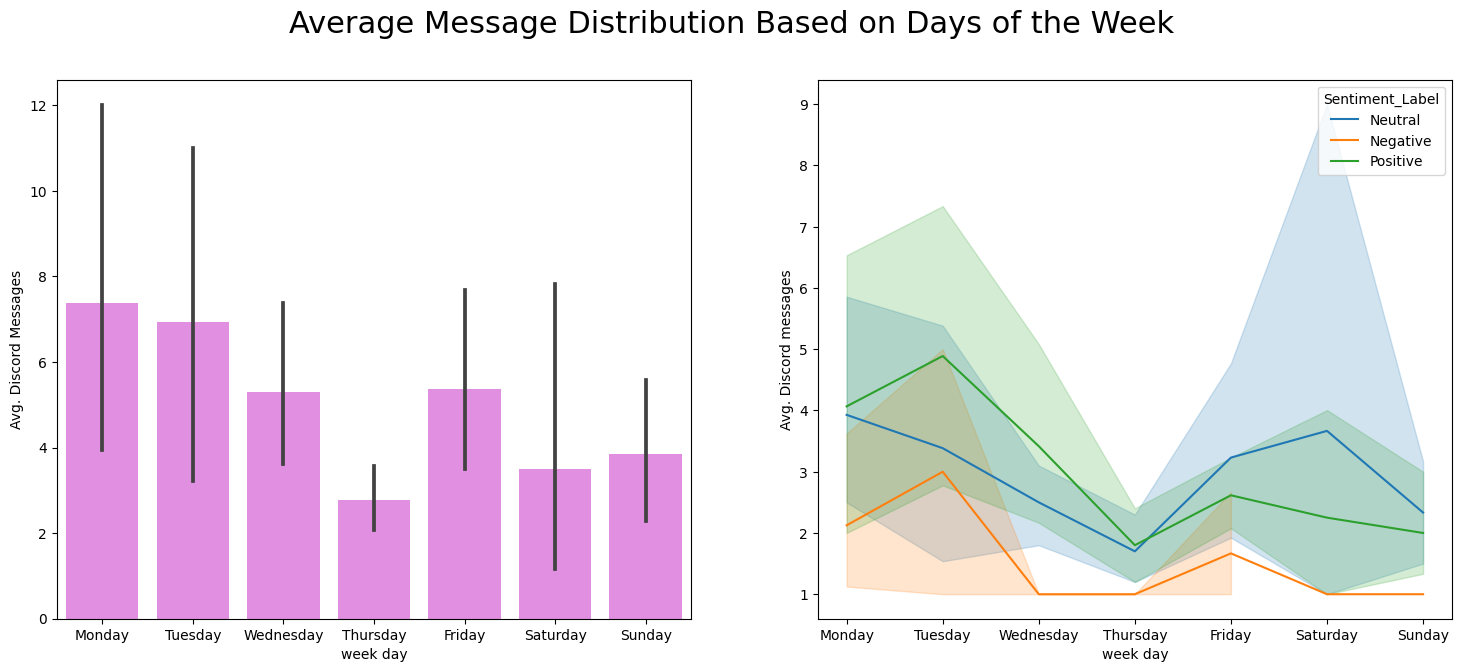

In [17]:
time =df[["Timestamp", 'date only', "Sentiment_Label"]]
time["week day"] = time["Timestamp"].dt.day_of_week
# pandas df representing number of discord messages every hour grouped by day and sentiment label. 
week_day = time.groupby(by=["date only",'week day',"Sentiment_Label"],as_index=False).count()
week_day["Message Count"] =week_day["Timestamp"]
week_day = week_day.drop(["Timestamp","date only"], axis=1)
#week_day_sentiment = week_day.groupby(by=['week day',"Sentiment_Label"],as_index=False).mean()
# group by df without sentiment label
week_day_non_sentiment = time.groupby(by=["date only",'week day'],as_index=False).count()
week_day_non_sentiment ["Message Count"] =week_day_non_sentiment ["Timestamp"]
week_day_non_sentiment = week_day_non_sentiment.drop(["Timestamp","date only","Sentiment_Label"], axis=1)
#week_day_non_sentiment = week_day_non_sentiment.groupby(by=['week day'],as_index=False).mean()
fig, axes = plt.subplots(1,2,figsize=(18,7))
plt.suptitle("Average Message Distribution Based on Days of the Week", size=22)
plt.subplot(1,2,1)
ax1 = sns.barplot(data=week_day_non_sentiment , x='week day', y="Message Count", color="violet")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.ylabel("Avg. Discord Messages")
plt.subplot(1,2,2)
ax2 = sns.lineplot(data=week_day , x='week day', y="Message Count", hue="Sentiment_Label")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.ylabel("Avg. Discord messages")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

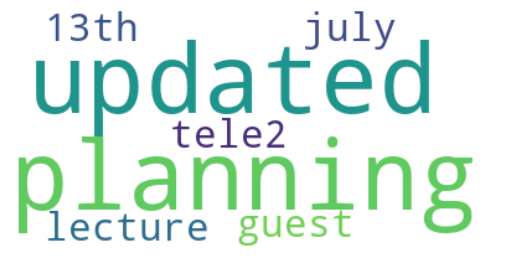

In [18]:
def remove_extra_words(x):
    extra_words = ["exam", "grade", "ladok", "online", "canvas", "presentation", "student"]
    b = x.split()
    c =[]
    for i in b:
        if i.lower() in extra_words:
            continue
        c.append(i)
    return " ".join(c)
df_7feb = df[df["date only"] == pd.to_datetime("2021-06-01").date() ]
df_7feb["Message_y"] = df_7feb["Message_y"].apply(remove_extra_words)
long_text = " ".join([i for i in df_7feb["Message_y"].values])
w_cloud = WordCloud(background_color="white", max_words=3000, contour_width=5, contour_color='steelblue')
w_cloud.generate(long_text)
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

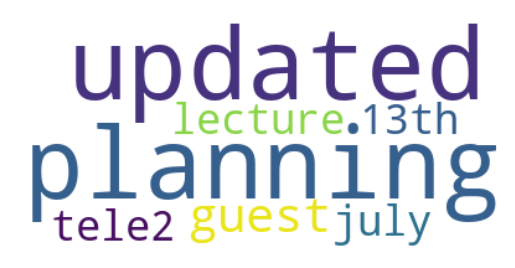

In [19]:
df_15mar = df[df["date only"] == pd.to_datetime("2021-06-01").date() ]
df_15mar["Message_y"] = df_15mar["Message_y"].apply(remove_extra_words)
long_text = " ".join([i for i in df_15mar["Message_y"].values])
w_cloud = WordCloud(background_color="white", max_words=3000, contour_width=5, contour_color='steelblue')
w_cloud.generate(long_text)
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis('off')